In [ ]:
import warnings
warnings.filterwarnings("ignore")


#**GARCH Model for  TEL AVIV Stock  Forecasting**
Model is used to forecast the volatility (jump) instead of actual price.

In [3]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 12.6 MB/s eta 0:00:00


In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import numpy as np
import scipy.stats as stats

#**TEL AVIV Stock Exchange Top 10 Stocks Volatillity**

In [15]:
tase_tickers = ['TEVA.TA', 'PTNR.TA', 'ICL.TA', 'ORL.TA',
                'NICE.TA', 'ELCO.TA']
start_date = '1900-01-01'
end_date = '2024-11-15'


data = yf.download(tase_tickers, start=start_date, end=end_date)['Adj Close']


data.to_csv('tase_stock_data.csv')
print("Data saved to tase_stock_data.csv")

[*********************100%***********************]  6 of 6 completed


Data saved to tase_stock_data.csv


In [16]:
print(data.head())


Ticker                         ELCO.TA      ICL.TA      NICE.TA  ORL.TA  \
Date                                                                      
2002-08-12 00:00:00+00:00  2534.014404  160.324280  2524.994385     NaN   
2002-08-13 00:00:00+00:00  2541.359131  159.986786  2500.336182     NaN   
2002-08-14 00:00:00+00:00  2517.121094  158.872696  2529.926025     NaN   
2002-08-15 00:00:00+00:00  2528.872803  160.898239  2505.267578     NaN   
2002-08-18 00:00:00+00:00  2500.960938  160.898239  2529.926025     NaN   

Ticker                         PTNR.TA      TEVA.TA  
Date                                                 
2002-08-12 00:00:00+00:00  1237.206299  6240.512695  
2002-08-13 00:00:00+00:00  1235.516357  6377.447754  
2002-08-14 00:00:00+00:00  1214.670654  6431.818848  
2002-08-15 00:00:00+00:00  1211.854004  6407.654785  
2002-08-18 00:00:00+00:00  1223.685059  6399.599121  


**Companies Used:**

TEVA.TA: Teva Pharmaceutical Industries, a global pharmaceutical company known for generics and specialty drugs.

PTNR.TA: Partner Communications, a telecommunications provider in Israel.

ICL.TA: Israel Chemicals Ltd., a specialty minerals and chemicals company.

ORL.TA: Oil Refineries Ltd., the largest oil refinery in Israel.

PERRIGO.TA: Perrigo, an international healthcare supplier.

NICE.TA: NICE Ltd., a software company focused on customer engagement.

ELCO.TA: Elco Ltd., a diversified holding company.

BOS.TA: BOS Better Online Solutions, a tech company specializing in RFID.

SHL.TA: SHL Telemedicine, offering remote medical monitoring services.

ARL.TA: Africa Israel Investments, a real estate and infrastructure firm.



In [17]:
data.head()

Ticker,ELCO.TA,ICL.TA,NICE.TA,ORL.TA,PTNR.TA,TEVA.TA
Date,,,,,,
2002-08-12 00:00:00+00:00,2534.014404,160.324280,2524.994385,NaN,1237.206299,6240.512695
2002-08-13 00:00:00+00:00,2541.359131,159.986786,2500.336182,NaN,1235.516357,6377.447754
2002-08-14 00:00:00+00:00,2517.121094,158.872696,2529.926025,NaN,1214.670654,6431.818848
2002-08-15 00:00:00+00:00,2528.872803,160.898239,2505.267578,NaN,1211.854004,6407.654785
2002-08-18 00:00:00+00:00,2500.960938,160.898239,2529.926025,NaN,1223.685059,6399.599121


In [18]:
returns = data.pct_change().dropna()

# Here we create an empty dictionary to store the GARCH model results for each stock
# Set up GARCH modeling for each stock

In [20]:
garch_results = {}
for ticker in tase_tickers:
    model = arch_model(returns[ticker], vol='Garch', p=1, q=1)
    garch_results[ticker] = model.fit(disp='off')
    print(f"GARCH Model fit for {ticker} complete.")


GARCH Model fit for TEVA.TA complete.
GARCH Model fit for PTNR.TA complete.
GARCH Model fit for ICL.TA complete.
GARCH Model fit for ORL.TA complete.
GARCH Model fit for NICE.TA complete.
GARCH Model fit for ELCO.TA complete.


The Visualization  Part For the Tel Aviv Stocks

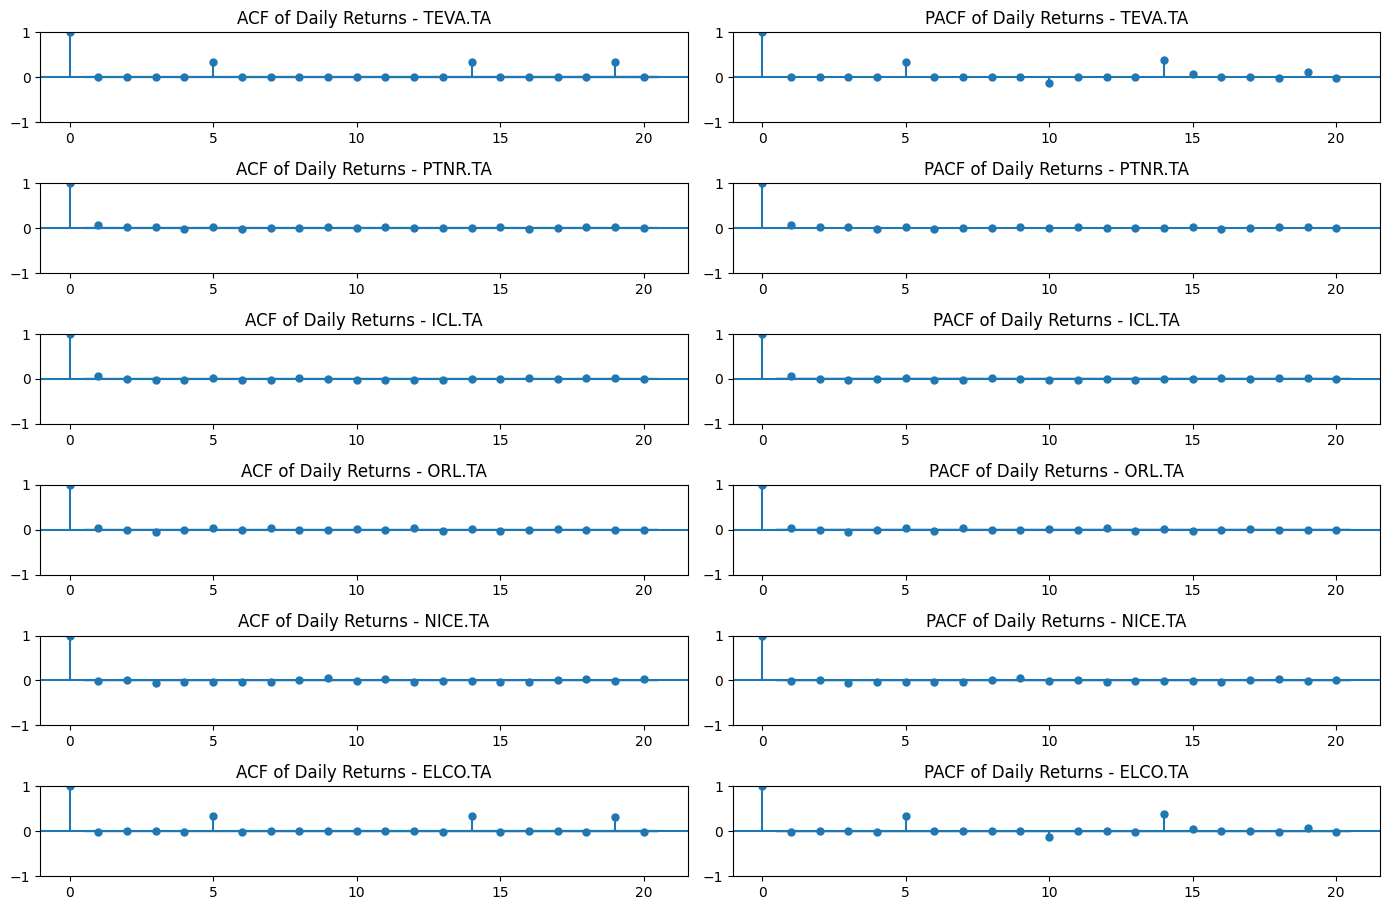

In [21]:
plt.figure(figsize=(14, 15))

for i, ticker in enumerate(tase_tickers):
    # ACF Plot
    plt.subplot(10, 2, 2 * i + 1)
    plot_acf(returns[ticker], ax=plt.gca(), lags=20)
    plt.title(f"ACF of Daily Returns - {ticker}")

    # PACF Plot
    plt.subplot(10, 2, 2 * i + 2)
    plot_pacf(returns[ticker], ax=plt.gca(), lags=20)
    plt.title(f"PACF of Daily Returns - {ticker}")

plt.tight_layout()
plt.show()


The Above we can see the ACF And PACF Plots for the data  which is   provided  via visuallization for all the shares

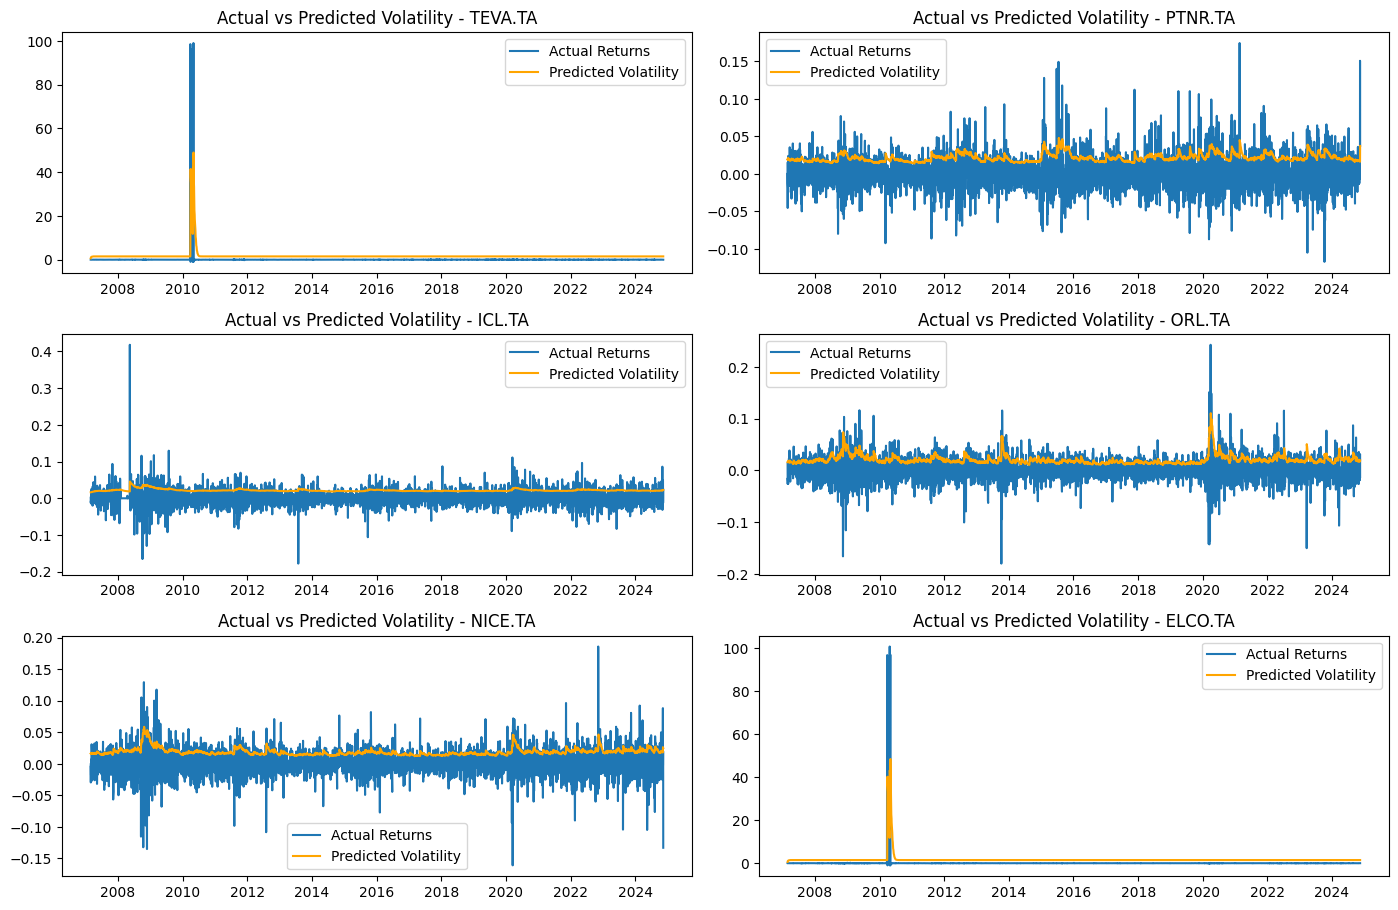

In [22]:
plt.figure(figsize=(14, 15))
for i, ticker in enumerate(tase_tickers):
    plt.subplot(5, 2, i + 1)
    garch_volatility = garch_results[ticker].conditional_volatility
    plt.plot(returns[ticker], label='Actual Returns')
    plt.plot(garch_volatility, color='orange', label='Predicted Volatility')
    plt.title(f'Actual vs Predicted Volatility - {ticker}')
    plt.legend()

plt.tight_layout()
plt.show()

The Above we  see  the  comparision and relationship between the   the actual and predicted  volatillity of the shares

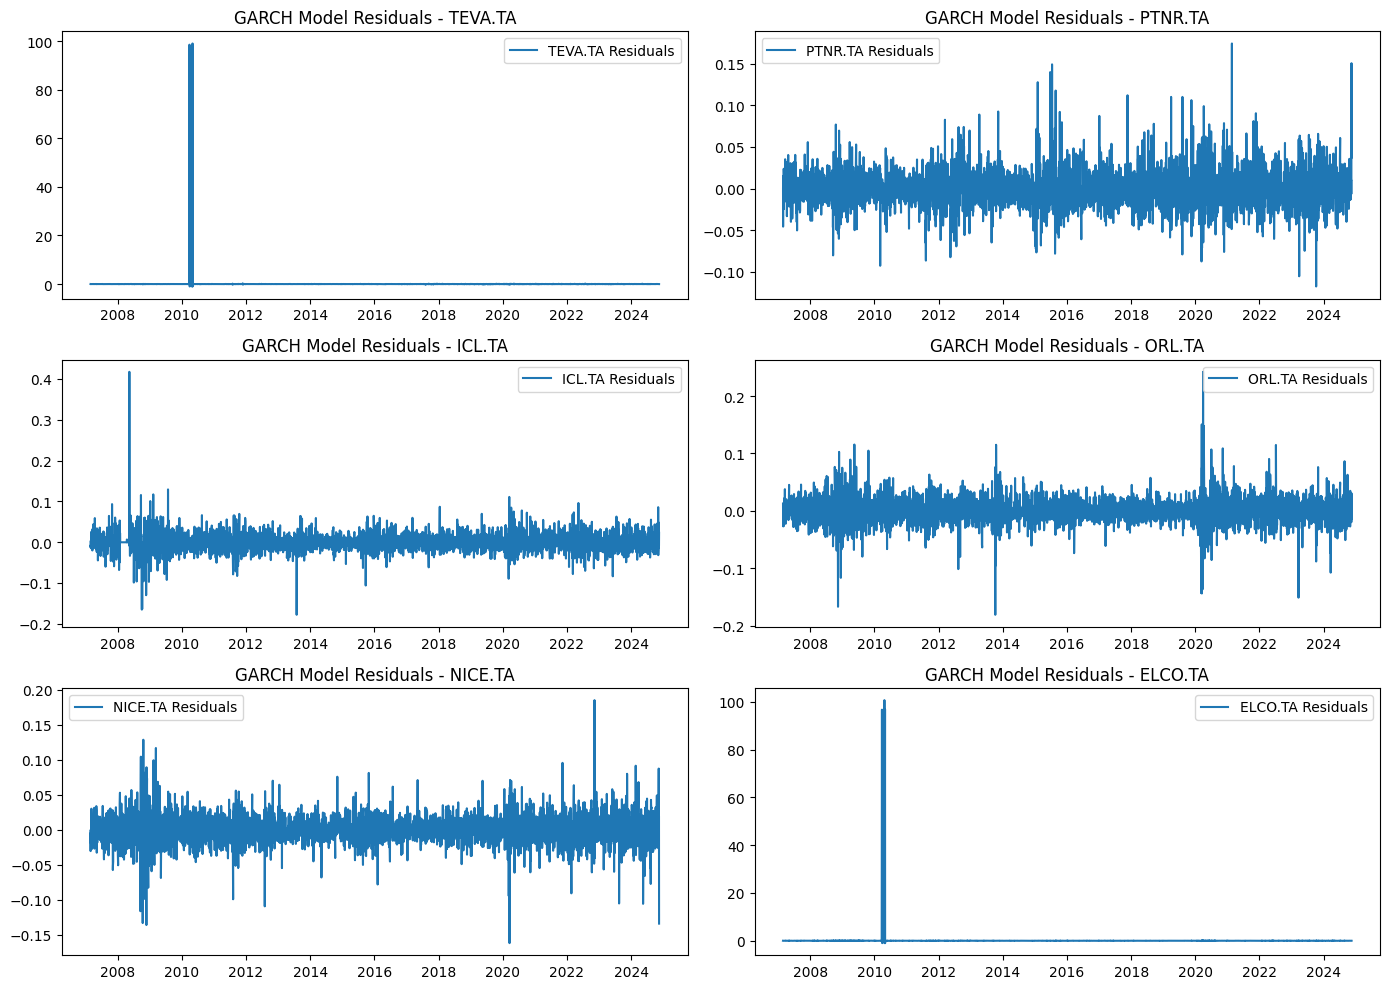

In [23]:
plt.figure(figsize=(14, 10))
for i, ticker in enumerate(tase_tickers):
    plt.subplot(3, 2, i+1)
    residuals = garch_results[ticker].resid
    plt.plot(residuals, label=f'{ticker} Residuals')
    plt.title(f'GARCH Model Residuals - {ticker}')
    plt.legend()

plt.tight_layout()
plt.show()

the  above provides the  residual  difference between the actual and predicted

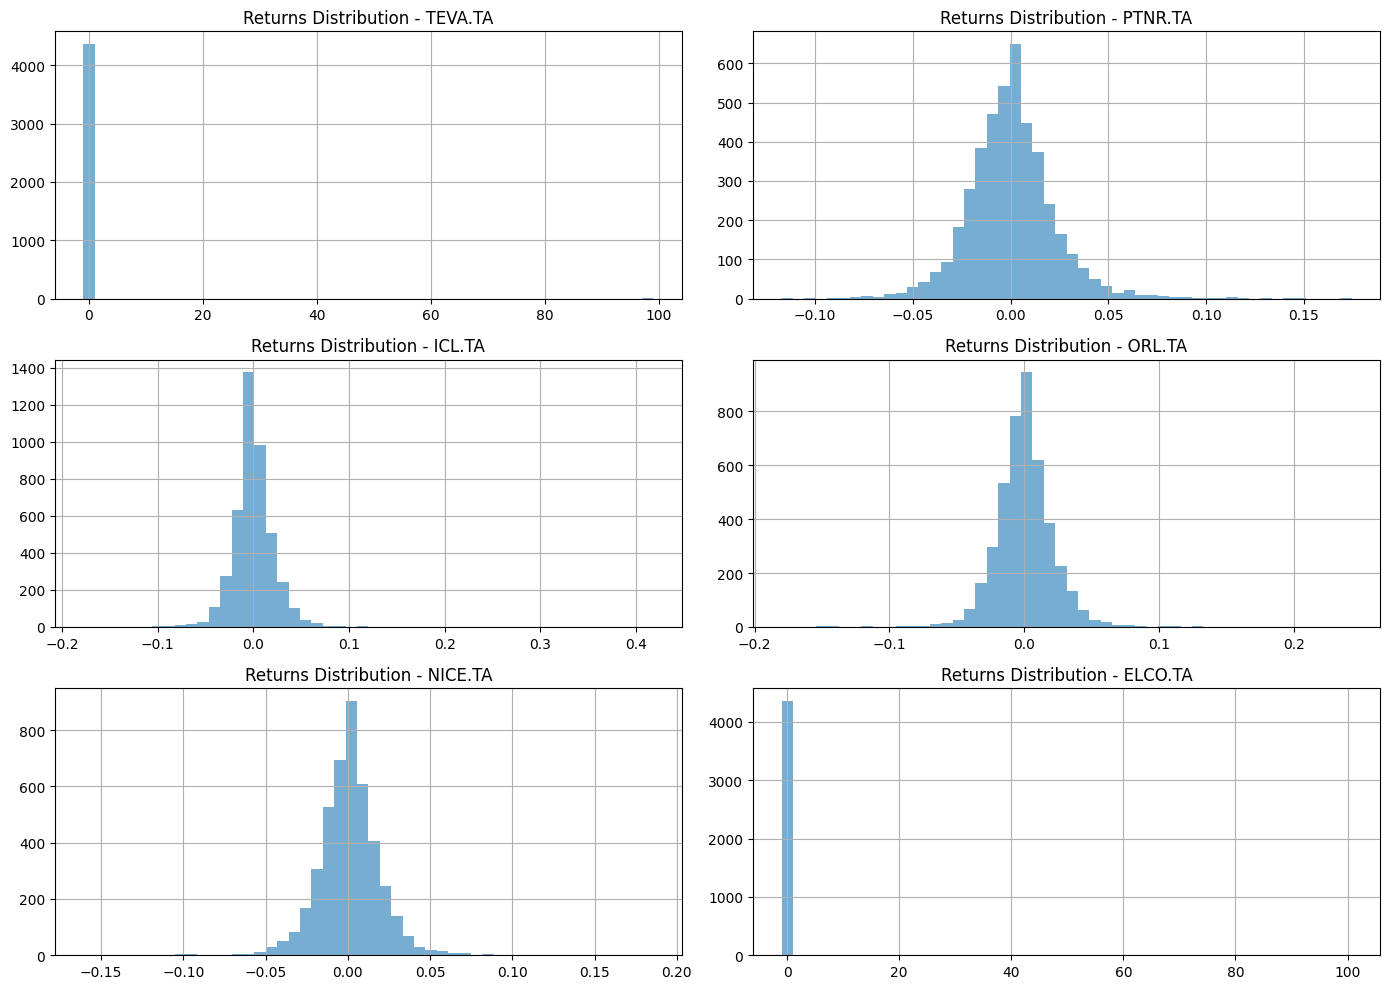

In [24]:
plt.figure(figsize=(14, 10))
for i, ticker in enumerate(tase_tickers):
    plt.subplot(3, 2, i+1)
    returns[ticker].hist(bins=50, alpha=0.6)
    plt.title(f'Returns Distribution - {ticker}')

plt.tight_layout()
plt.show()

the distribution of the volatillity

In [25]:
print("\nLjung-Box Test Results for GARCH Model Residuals")
for ticker in tase_tickers:
    lb_test = acorr_ljungbox(garch_results[ticker].resid, lags=[10], return_df=True)
    print(f"\n{ticker} Ljung-Box Test:\n{lb_test}")


Ljung-Box Test Results for GARCH Model Residuals

TEVA.TA Ljung-Box Test:
      lb_stat     lb_pvalue
10  480.39782  6.796323e-97

PTNR.TA Ljung-Box Test:
      lb_stat  lb_pvalue
10  30.007184   0.000854

ICL.TA Ljung-Box Test:
      lb_stat  lb_pvalue
10  34.106106   0.000177

ORL.TA Ljung-Box Test:
      lb_stat  lb_pvalue
10  39.279633   0.000023

NICE.TA Ljung-Box Test:
    lb_stat     lb_pvalue
10  53.8572  5.158643e-08

ELCO.TA Ljung-Box Test:
       lb_stat      lb_pvalue
10  498.623967  8.688372e-101


The above provides the  Ljung  Box test for each of the available tickers present and use for the operations

TEVA.TA and ELCO.TA show extremely low
𝑝
p-values (close to zero), indicating strong evidence of autocorrelation in residuals, suggesting the GARCH model may not fully capture the volatility for these stocks.

Stocks like PTNR.TA, ICL.TA, and ORL.TA have
𝑝
p-values that are significant, though less extreme, also indicating some autocorrelation.

In [26]:
print("\nSkewness and Kurtosis for Returns and Residuals")
for ticker in tase_tickers:
    returns_skewness = stats.skew(returns[ticker])
    returns_kurtosis = stats.kurtosis(returns[ticker])
    residuals_skewness = stats.skew(garch_results[ticker].resid)
    residuals_kurtosis = stats.kurtosis(garch_results[ticker].resid)
    print(f"\n{ticker} - Returns: Skewness={returns_skewness:.2f}, Kurtosis={returns_kurtosis:.2f}")
    print(f"{ticker} - Residuals: Skewness={residuals_skewness:.2f}, Kurtosis={residuals_kurtosis:.2f}")


Skewness and Kurtosis for Returns and Residuals

TEVA.TA - Returns: Skewness=38.11, Kurtosis=1450.80
TEVA.TA - Residuals: Skewness=38.11, Kurtosis=1450.80

PTNR.TA - Returns: Skewness=0.60, Kurtosis=4.37
PTNR.TA - Residuals: Skewness=0.60, Kurtosis=4.37

ICL.TA - Returns: Skewness=1.39, Kurtosis=34.51
ICL.TA - Residuals: Skewness=1.39, Kurtosis=34.51

ORL.TA - Returns: Skewness=0.17, Kurtosis=10.00
ORL.TA - Residuals: Skewness=0.17, Kurtosis=10.00

NICE.TA - Returns: Skewness=-0.10, Kurtosis=7.88
NICE.TA - Residuals: Skewness=-0.10, Kurtosis=7.88

ELCO.TA - Returns: Skewness=38.12, Kurtosis=1452.21
ELCO.TA - Residuals: Skewness=38.12, Kurtosis=1452.21



1. **TEVA.TA** and **ELCO.TA** have exceptionally high skewness and kurtosis, indicating extreme asymmetry and heavy tails in returns, which may reflect rare, large price movements or volatility spikes.
2. **PTNR.TA** and **NICE.TA** show lower skewness and kurtosis, closer to normality, with slight positive skewness and moderate tails.
3. **ICL.TA** and **ORL.TA** have moderate kurtosis, suggesting occasional large price changes.


In [27]:
for ticker in tase_tickers:
    print(f"\n=== Actual and Predicted Volatility for {ticker} ===")
    actual_returns = returns[ticker]
    predicted_volatility = garch_results[ticker].conditional_volatility
    combined_df = pd.DataFrame({
        'Actual Returns': actual_returns,
        'Predicted Volatility': predicted_volatility
    })
    print(combined_df)


=== Actual and Predicted Volatility for TEVA.TA ===
                           Actual Returns  Predicted Volatility
Date                                                           
2007-02-26 00:00:00+00:00       -0.001264              0.634441
2007-02-27 00:00:00+00:00       -0.026582              0.853893
2007-02-28 00:00:00+00:00       -0.020156              0.999175
2007-03-01 00:00:00+00:00       -0.024552              1.104495
2007-03-05 00:00:00+00:00        0.010204              1.184227
...                                   ...                   ...
2024-11-10 00:00:00+00:00       -0.008874              1.500650
2024-11-11 00:00:00+00:00        0.007410              1.500636
2024-11-12 00:00:00+00:00       -0.010267              1.500586
2024-11-13 00:00:00+00:00       -0.010373              1.500588
2024-11-14 00:00:00+00:00       -0.014080              1.500591

[4367 rows x 2 columns]

=== Actual and Predicted Volatility for PTNR.TA ===
                           Actual Ret

the  tables provides the  difference between the actual and predicted volatility

**Conclusion:**

we  have applied the   garch model  over the  huge amount of israel shares data and thus  used many tests and  visualizations to get the  efficeint  results